In [118]:
from tensorflow.examples.tutorials.mnist import input_data

In [119]:
import tensorflow as tf
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [120]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()
    

In [121]:
#layers declaration
inputs=784
hidden_1=512
hidden_2=128
outputs=10


In [122]:
x=tf.placeholder(tf.float32,[None,784])
y_original=tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)



In [123]:
#for sgd using xavor-glorot weights intiakixation
#mean and std from formula of xaviorglorot
weights_sgd={
    "h1":tf.Variable(tf.random_normal([inputs,hidden_1],stddev=0.062,mean=0)),
    "h2":tf.Variable(tf.random_normal([hidden_1,hidden_2],stddev=0.055,mean=0)),
    "out":tf.Variable(tf.random_normal([hidden_2,outputs],stddev=0.120,mean=0))
}


#relu take  he
weights_relu={
     "h1":tf.Variable(tf.random_normal([inputs,hidden_1],stddev=0.062,mean=0)),
    "h2":tf.Variable(tf.random_normal([hidden_1,hidden_2],stddev=0.125,mean=0)),
    "out":tf.Variable(tf.random_normal([hidden_2,outputs],stddev=0.120,mean=0))
}

#biases +b term
biases = {
    'b1': tf.Variable(tf.random_normal([hidden_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([hidden_2])),             #128x1
    'out': tf.Variable(tf.random_normal([outputs]))              #10x1
}


In [124]:
# Parameters
training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1

#  Model 1: input (784) - sigmoid(512) - sigmoid(128) - softmax(output 10)

In [125]:
def mlp(x,w,b):
    #on layer_1
    print("hello")
    print( 'x:', x.get_shape(), 'W1:', w['h1'].get_shape(), 'b1:', b['b1'].get_shape())
    layer_1 = tf.add(tf.matmul(x, w['h1']), b['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    #on layer 2
    layer_2=tf.add(tf.matmul(layer_1,w["h2"]),b["b2"])
    layer_2=tf.nn.sigmoid(layer_2)
    
    #out later
    out_layer = tf.matmul(layer_2, w['out']) + b['out'] #don't know wy tf.add not worked
    out_layer=tf.nn.sigmoid(out_layer)
    
    return out_layer
y_pred=mlp(x,weights_sgd,biases) 

hello
x: (?, 784) W1: (784, 512) b1: (512,)


# Model1 using adam

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch: 0001 train cost=1.678713039 test cost=1.672874137
Epoch: 0002 train cost=1.535774306 test cost=1.533497525
Epoch: 0003 train cost=1.513856680 test cost=1.513835785
Epoch: 0004 train cost=1.501910995 test cost=1.503187793
Epoch: 0005 train cost=1.493658805 test cost=1.496240770
Epoch: 0006 train cost=1.487863670 test cost=1.491556647
Epoch: 0007 train cost=1.483439344 test cost=1.488155701
Epoch: 0008 train cost=1.480067108 test cost=1.485900301
Epoch: 0009 train cost=1.477271159 test cost=1.484272776
Epoch: 0010 train cost=1.474913240 test cost=1.483324572
Epoch: 0011 train cost=1.473222646 test cost=1.482279597
Epoch: 0012 train cost=1.471533090 test cost=1.481685323
Epoch: 0013 train cost=1.470265813 test cost=1.480946942
Epoch: 0014 train cost=1.469443405 test cost=1.480739669
Epoch: 001

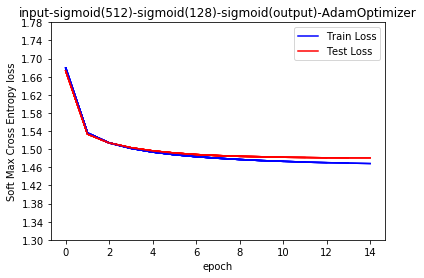

In [12]:

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        train_cost=0.
        test_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer, cost,weights_sgd], feed_dict={x: batch_xs, y_original: batch_ys})
            train_cost += c
            c = sess.run(cost, feed_dict={x: mnist.test.images, y_original: mnist.test.labels})
            test_cost += c 
        
        train_avg_cost=train_cost/total_batch
        test_avg_cost=test_cost/total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels}))
    

# model1 + gdoptimizer

Epoch: 0001 train cost=2.322067203 test cost=2.323996540
Epoch: 0002 train cost=2.318035388 test cost=2.319774003
Epoch: 0003 train cost=2.314412810 test cost=2.315973172
Epoch: 0004 train cost=2.311236226 test cost=2.312558764
Epoch: 0005 train cost=2.308508344 test cost=2.309635563
Epoch: 0006 train cost=2.306205431 test cost=2.307164694
Epoch: 0007 train cost=2.304285284 test cost=2.305106118
Epoch: 0008 train cost=2.302701028 test cost=2.303357326
Epoch: 0009 train cost=2.301387543 test cost=2.301980160
Epoch: 0010 train cost=2.300293019 test cost=2.300746520
Epoch: 0011 train cost=2.299367889 test cost=2.299719979
Epoch: 0012 train cost=2.298572297 test cost=2.298838268
Epoch: 0013 train cost=2.297869771 test cost=2.298062769
Epoch: 0014 train cost=2.297235012 test cost=2.297355450
Epoch: 0015 train cost=2.296649374 test cost=2.296699631
Accuracy: 0.1171


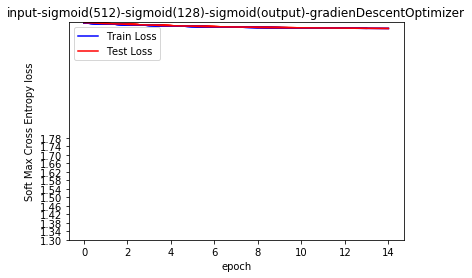

In [60]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        train_cost=0.
        test_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer, cost,weights_sgd], feed_dict={x: batch_xs, y_original: batch_ys})
            train_cost += c
            c = sess.run(cost, feed_dict={x: mnist.test.images, y_original: mnist.test.labels})
            test_cost += c 
        
        train_avg_cost=train_cost/total_batch
        test_avg_cost=test_cost/total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-gradienDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(512)-sigmoid(128)-sigmoid(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels}))
    

# model2 use relu inplace of sigmoid for hidden layers
input (784) - ReLu(512) - ReLu(128) - sigmoid(output 10) 

In [72]:
def mlp_relu(x,w,b):
    #on layer_1
    print("hello")
    print( 'x:', x.get_shape(), 'W1:', w['h1'].get_shape(), 'b1:', b['b1'].get_shape())
    layer_1 = tf.add(tf.matmul(x, w['h1']), b['b1'])
    layer_1=tf.nn.relu(layer_1)
    #on layer 2
    layer_2=tf.add(tf.matmul(layer_1,w["h2"]),b["b2"])
    layer_2=tf.nn.relu(layer_2)
    
    #out later
    out_layer = tf.matmul(layer_2, w['out']) + b['out'] #don't know wy tf.add not worked
    out_layer=tf.nn.sigmoid(out_layer)
    
    return out_layer
y_pred=mlp_relu(x,weights_relu,biases) 

hello
x: (?, 784) W1: (784, 512) b1: (512,)


Epoch: 0001 train cost=1.568248596 test cost=1.562997429
Epoch: 0002 train cost=1.499094431 test cost=1.499568664
Epoch: 0003 train cost=1.487736428 test cost=1.491264739
Epoch: 0004 train cost=1.481428071 test cost=1.487013261
Epoch: 0005 train cost=1.477972110 test cost=1.484544828
Epoch: 0006 train cost=1.475074967 test cost=1.483223126
Epoch: 0007 train cost=1.473301954 test cost=1.481942628
Epoch: 0008 train cost=1.471831650 test cost=1.481506860
Epoch: 0009 train cost=1.470807369 test cost=1.481076575
Epoch: 0010 train cost=1.469580100 test cost=1.480574571
Epoch: 0011 train cost=1.468898119 test cost=1.480038033
Epoch: 0012 train cost=1.468561336 test cost=1.479775831
Epoch: 0013 train cost=1.467775021 test cost=1.479633929
Epoch: 0014 train cost=1.467326480 test cost=1.479314099
Epoch: 0015 train cost=1.467160662 test cost=1.479373585
Accuracy: 0.9768


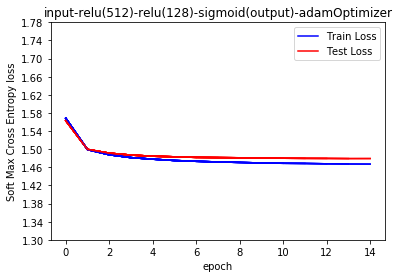

In [73]:
#adam
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        train_cost=0.
        test_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer, cost,weights_relu], feed_dict={x: batch_xs, y_original: batch_ys})
            train_cost += c
            c = sess.run(cost, feed_dict={x: mnist.test.images, y_original: mnist.test.labels})
            test_cost += c 
        
        train_avg_cost=train_cost/total_batch
        test_avg_cost=test_cost/total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-sigmoid(output)-adamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-sigmoid(output)-adamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels}))
    

Epoch: 0001 train cost=2.292779480 test cost=2.290018569
Epoch: 0002 train cost=2.173264359 test cost=2.169039750
Epoch: 0003 train cost=2.087218007 test cost=2.080708754
Epoch: 0004 train cost=2.019738810 test cost=2.011344197
Epoch: 0005 train cost=1.958732367 test cost=1.949232805
Epoch: 0006 train cost=1.905577708 test cost=1.896905303
Epoch: 0007 train cost=1.869879110 test cost=1.861411909
Epoch: 0008 train cost=1.841472406 test cost=1.833260606
Epoch: 0009 train cost=1.818319188 test cost=1.810298321
Epoch: 0010 train cost=1.799109466 test cost=1.791303897
Epoch: 0011 train cost=1.782945106 test cost=1.775205012
Epoch: 0012 train cost=1.769146075 test cost=1.761549993
Epoch: 0013 train cost=1.757217925 test cost=1.749718769
Epoch: 0014 train cost=1.746813640 test cost=1.739335880
Epoch: 0015 train cost=1.737660980 test cost=1.730220567
Accuracy: 0.8206


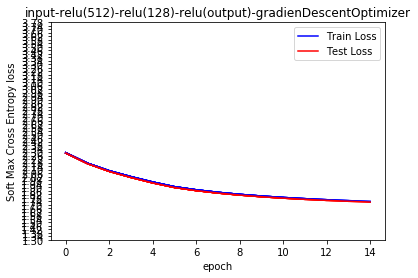

In [74]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        train_cost=0.
        test_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer, cost,weights_relu], feed_dict={x: batch_xs, y_original: batch_ys})
            train_cost += c
            c = sess.run(cost, feed_dict={x: mnist.test.images, y_original: mnist.test.labels})
            test_cost += c 
        
        train_avg_cost=train_cost/total_batch
        test_avg_cost=test_cost/total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-relu(output)-gradienDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 3.8, step=0.04), "input-relu(512)-relu(128)-relu(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels}))
    

# Model 3: Input - Sigmoid(BatchNormalization(512)) - Sigmoid(BatchNormalization(128))- Sigmoid(output) 

In [75]:
epsilon = 1e-3
def mlp_sig_batch(x,w,b):
    #on layer_1
    print("hello")
    print( 'x:', x.get_shape(), 'W1:', w['h1'].get_shape(), 'b1:', b['b1'].get_shape())
    layer_1 = tf.add(tf.matmul(x, w['h1']), b['b1'])
    #layer_1=tf.nn.sigmoid(layer_1)
    
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    
    scale_1 = tf.Variable(tf.ones([hidden_1]))
    beta_1 = tf.Variable(tf.zeros([hidden_1]))
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
    layer_1 = tf.nn.sigmoid(layer_1)
    #on layer 2
    layer_2=tf.add(tf.matmul(layer_1,w["h2"]),b["b2"])
    #layer_2=tf.nn.sigmoid(layer_2)
    
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, [0])
    
    scale_2 = tf.Variable(tf.ones([hidden_2]))
    beta_2 = tf.Variable(tf.zeros([hidden_2]))
    
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #out later
    out_layer = tf.matmul(layer_2, w['out']) + b['out'] #don't know wy tf.add not worked
    out_layer=tf.nn.sigmoid(out_layer)
    
    return out_layer
y_pred=mlp_sig_batch(x,weights_sgd,biases)

hello
x: (?, 784) W1: (784, 512) b1: (512,)


# model 3+adam

Epoch: 0001 train cost=1.705656165 test cost=1.696769579
Epoch: 0002 train cost=1.557700783 test cost=1.553393691
Epoch: 0003 train cost=1.517304391 test cost=1.515994775
Epoch: 0004 train cost=1.500235525 test cost=1.501644918
Epoch: 0005 train cost=1.491702562 test cost=1.494837937
Epoch: 0006 train cost=1.486232786 test cost=1.490837512
Epoch: 0007 train cost=1.482334939 test cost=1.488054262
Epoch: 0008 train cost=1.479372136 test cost=1.486196402
Epoch: 0009 train cost=1.476868422 test cost=1.485001386
Epoch: 0010 train cost=1.475517553 test cost=1.484181679
Epoch: 0011 train cost=1.473964423 test cost=1.483171463
Epoch: 0012 train cost=1.472522723 test cost=1.482904118
Epoch: 0013 train cost=1.471344296 test cost=1.482000369
Epoch: 0014 train cost=1.470731201 test cost=1.481606980
Epoch: 0015 train cost=1.470180749 test cost=1.480923259
Accuracy: 0.9783


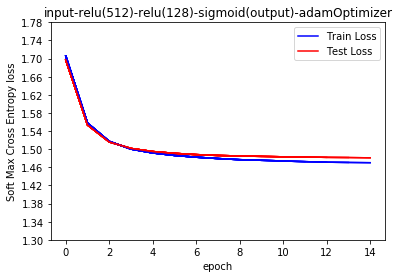

In [76]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        train_cost=0.
        test_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer, cost,weights_sgd], feed_dict={x: batch_xs, y_original: batch_ys})
            train_cost += c
            c = sess.run(cost, feed_dict={x: mnist.test.images, y_original: mnist.test.labels})
            test_cost += c 
        
        train_avg_cost=train_cost/total_batch
        test_avg_cost=test_cost/total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-sigmoid(output)-adamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-sigmoid(output)-adamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels}))

# model3+gdoptimizer

Epoch: 0001 train cost=2.327684029 test cost=2.328645738
Epoch: 0002 train cost=2.302330119 test cost=2.302629147
Epoch: 0003 train cost=2.275894557 test cost=2.275591071
Epoch: 0004 train cost=2.249410742 test cost=2.248590446
Epoch: 0005 train cost=2.223665468 test cost=2.222389796
Epoch: 0006 train cost=2.199760038 test cost=2.198051700
Epoch: 0007 train cost=2.177974588 test cost=2.175900349
Epoch: 0008 train cost=2.158397063 test cost=2.156020474
Epoch: 0009 train cost=2.140600553 test cost=2.138100934
Epoch: 0010 train cost=2.124601253 test cost=2.121804991
Epoch: 0011 train cost=2.109749195 test cost=2.106799072
Epoch: 0012 train cost=2.096015079 test cost=2.092873320
Epoch: 0013 train cost=2.082975078 test cost=2.079722313
Epoch: 0014 train cost=2.070848111 test cost=2.067238860
Epoch: 0015 train cost=2.058967948 test cost=2.055320672
Accuracy: 0.6341


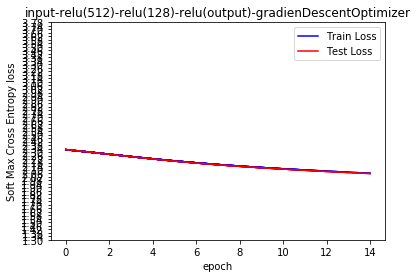

In [77]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        train_cost=0.
        test_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer, cost,weights_sgd], feed_dict={x: batch_xs, y_original: batch_ys})
            train_cost += c
            c = sess.run(cost, feed_dict={x: mnist.test.images, y_original: mnist.test.labels})
            test_cost += c 
        
        train_avg_cost=train_cost/total_batch
        test_avg_cost=test_cost/total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-relu(output)-gradienDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 3.8, step=0.04), "input-relu(512)-relu(128)-relu(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels}))
    

# Model 4: Input - relu(BatchNormalization(512)) - relu(BatchNormalization(128))- Sigmoid(output) 

In [78]:
epsilon = 1e-3
def mlp_relu_batch(x,w,b):
    #on layer_1
    print("hello")
    print( 'x:', x.get_shape(), 'W1:', w['h1'].get_shape(), 'b1:', b['b1'].get_shape())
    layer_1 = tf.add(tf.matmul(x, w['h1']), b['b1'])
    #layer_1=tf.nn.sigmoid(layer_1)
    
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    
    scale_1 = tf.Variable(tf.ones([hidden_1]))
    beta_1 = tf.Variable(tf.zeros([hidden_1]))
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
    layer_1 = tf.nn.sigmoid(layer_1)
    #on layer 2
    layer_2=tf.add(tf.matmul(layer_1,w["h2"]),b["b2"])
    #layer_2=tf.nn.sigmoid(layer_2)
    
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2, [0])
    
    scale_2 = tf.Variable(tf.ones([hidden_2]))
    beta_2 = tf.Variable(tf.zeros([hidden_2]))
    
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #out later
    out_layer = tf.matmul(layer_2, w['out']) + b['out'] #don't know wy tf.add not worked
    out_layer=tf.nn.sigmoid(out_layer)
    
    return out_layer
y_pred=mlp_relu_batch(x,weights_relu,biases)

hello
x: (?, 784) W1: (784, 512) b1: (512,)


# model4 +adam

Epoch: 0001 train cost=1.707587385 test cost=1.698750802
Epoch: 0002 train cost=1.562920602 test cost=1.559128176
Epoch: 0003 train cost=1.520499448 test cost=1.519157020
Epoch: 0004 train cost=1.502765260 test cost=1.504065380
Epoch: 0005 train cost=1.492649353 test cost=1.496303072
Epoch: 0006 train cost=1.486730264 test cost=1.491759936
Epoch: 0007 train cost=1.483041820 test cost=1.489428943
Epoch: 0008 train cost=1.479877166 test cost=1.486929984
Epoch: 0009 train cost=1.477584396 test cost=1.485364400
Epoch: 0010 train cost=1.475601314 test cost=1.484282082
Epoch: 0011 train cost=1.473963202 test cost=1.483201063
Epoch: 0012 train cost=1.472738413 test cost=1.482983307
Epoch: 0013 train cost=1.471793388 test cost=1.482264218
Epoch: 0014 train cost=1.471133876 test cost=1.481458303
Epoch: 0015 train cost=1.470229467 test cost=1.481413502
Accuracy: 0.9787


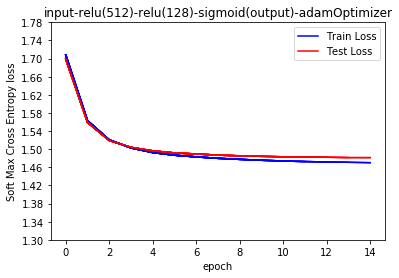

In [79]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        train_cost=0.
        test_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer, cost,weights_relu], feed_dict={x: batch_xs, y_original: batch_ys})
            train_cost += c
            c = sess.run(cost, feed_dict={x: mnist.test.images, y_original: mnist.test.labels})
            test_cost += c 
        
        train_avg_cost=train_cost/total_batch
        test_avg_cost=test_cost/total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-sigmoid(output)-adamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-sigmoid(output)-adamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels}))

# model4+gd

Epoch: 0001 train cost=2.335902958 test cost=2.333854731
Epoch: 0002 train cost=2.324325880 test cost=2.322017913
Epoch: 0003 train cost=2.312520568 test cost=2.310028356
Epoch: 0004 train cost=2.300273032 test cost=2.297592358
Epoch: 0005 train cost=2.287351991 test cost=2.284558427
Epoch: 0006 train cost=2.273733380 test cost=2.270716439
Epoch: 0007 train cost=2.259406923 test cost=2.256194265
Epoch: 0008 train cost=2.244304092 test cost=2.240954580
Epoch: 0009 train cost=2.228826499 test cost=2.225325659
Epoch: 0010 train cost=2.213217680 test cost=2.209609319
Epoch: 0011 train cost=2.197606915 test cost=2.193824914
Epoch: 0012 train cost=2.182588370 test cost=2.178608995
Epoch: 0013 train cost=2.167945685 test cost=2.163901060
Epoch: 0014 train cost=2.153875687 test cost=2.149794134
Epoch: 0015 train cost=2.140719863 test cost=2.136400588
Accuracy: 0.5564


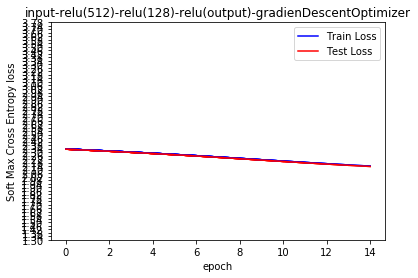

In [80]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        train_cost=0.
        test_cost=0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c, w = sess.run([optimizer, cost,weights_relu], feed_dict={x: batch_xs, y_original: batch_ys})
            train_cost += c
            c = sess.run(cost, feed_dict={x: mnist.test.images, y_original: mnist.test.labels})
            test_cost += c 
        
        train_avg_cost=train_cost/total_batch
        test_avg_cost=test_cost/total_batch
        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-relu(512)-relu(128)-relu(output)-gradienDescentOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
    plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 3.8, step=0.04), "input-relu(512)-relu(128)-relu(output)-GradientDescentOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels}))
    

# model5: Input - ReLu(512) - Dropout - ReLu(128)- Dropout -Sigmoid(output)

In [126]:
def mlp_relu_drop(x,w,b):
    #on layer_1
    print("hello")
    print( 'x:', x.get_shape(), 'W1:', w['h1'].get_shape(), 'b1:', b['b1'].get_shape())
    layer_1 = tf.add(tf.matmul(x, w['h1']), b['b1'])
    layer_1=tf.nn.relu(layer_1)
    # we are adding a drop out layer after the first hidden layer with parameter keep_prob
    layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
    #on layer 2
    layer_2=tf.add(tf.matmul(layer_1_drop,w["h2"]),b["b2"])
    layer_2=tf.nn.relu(layer_2)
    layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
    
    #out later
    out_layer = tf.matmul(layer_2_drop, w['out']) + b['out'] #don't know wy tf.add not worked
    out_layer=tf.nn.sigmoid(out_layer)
    
    return out_layer

y_pred=mlp_relu_drop(x,weights_relu,biases)


hello
x: (?, 784) W1: (784, 512) b1: (512,)


# model5+adam

Epoch: 0001 train cost=1.677966303 test cost=1.602056041
Epoch: 0002 train cost=1.549796240 test cost=1.517175139
Epoch: 0003 train cost=1.528124384 test cost=1.504116198
Epoch: 0004 train cost=1.516113264 test cost=1.496724177
Epoch: 0005 train cost=1.509624178 test cost=1.492531535
Epoch: 0006 train cost=1.504373657 test cost=1.489117675
Epoch: 0007 train cost=1.499951427 test cost=1.487217655
Epoch: 0008 train cost=1.496818192 test cost=1.486462814
Epoch: 0009 train cost=1.494496909 test cost=1.484793502
Epoch: 0010 train cost=1.492730631 test cost=1.484077873
Epoch: 0011 train cost=1.490731324 test cost=1.483280603
Epoch: 0012 train cost=1.489554757 test cost=1.482787810
Epoch: 0013 train cost=1.488956883 test cost=1.481646517
Epoch: 0014 train cost=1.487642568 test cost=1.481188283
Epoch: 0015 train cost=1.486318435 test cost=1.480563662
Accuracy: 0.9731


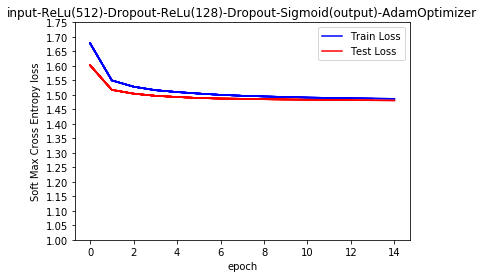

In [129]:

cost_drop=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original)) 
optimizer_drop_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)
#optimizer_drop_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c = sess.run([optimizer_drop_adam, cost_drop], feed_dict={x: batch_xs, y_original: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = cost_drop.eval({x: mnist.test.images, y_original: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels, keep_prob: 1.0 }))

Epoch: 0001 train cost=2.372495037 test cost=2.340705347
Epoch: 0002 train cost=2.355765774 test cost=2.314403372
Epoch: 0003 train cost=2.342179219 test cost=2.284180991
Epoch: 0004 train cost=2.324893026 test cost=2.252949409
Epoch: 0005 train cost=2.308484642 test cost=2.222003190
Epoch: 0006 train cost=2.292934260 test cost=2.190914226
Epoch: 0007 train cost=2.279975996 test cost=2.163435033
Epoch: 0008 train cost=2.263346063 test cost=2.140456541
Epoch: 0009 train cost=2.250992412 test cost=2.115321404
Epoch: 0010 train cost=2.236830519 test cost=2.088805616
Epoch: 0011 train cost=2.222527867 test cost=2.059449755
Epoch: 0012 train cost=2.207323370 test cost=2.028661243
Epoch: 0013 train cost=2.191149990 test cost=1.995577423
Epoch: 0014 train cost=2.174752348 test cost=1.963000713
Epoch: 0015 train cost=2.158945589 test cost=1.933459875
Accuracy: 0.5801


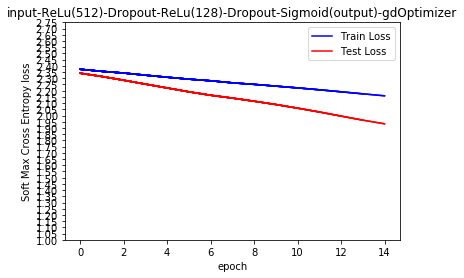

In [131]:
cost_drop=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_original)) 
optimizer_drop_sgdc = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # here we use AdamOptimizer
            _, c, w = sess.run([optimizer_drop_sgdc, cost_drop, weights_relu], feed_dict={x: batch_xs, y_original: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = cost_drop.eval({x: mnist.test.images, y_original: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-gdOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 2.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(128)-Dropout-Sigmoid(output)-gdOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_original,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_original: mnist.test.labels, keep_prob: 1.0 }))